### Set standard imports

In [72]:
import matplotlib,lmfit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib qt
import KiMoPack.plot_func as pf
from importlib import reload
reload(pf)
#from KiMoPack.plotfunc import pf

Plot_func version 6.8.0
was imported from path:
 C:\Users\Jens\anaconda3\Lib\site-packages\KiMoPack
The current working folder is:
 D:\Dropbox\coding\github\KiMoPack\Workflow_tools\additional_formats\streak_camera


<module 'KiMoPack.plot_func' from 'C:\\Users\\Jens\\anaconda3\\lib\\site-packages\\KiMoPack\\plot_func.py'>

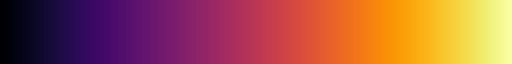

In [73]:
pf.cm.inferno

In [74]:
from import_library import streak_Lund
ta=pf.TA('recent',conversion_function=streak_Lund,shift_times_by=-552)
#ta=pf.TA('FeCM02-266nm-4mw-QB390-t6-G63-w450-s150-556ms-E100.dat',conversion_function=streak_Lund,shift_times_by=-552)

In [75]:
plt.close('all')
#set intensity to the intensity of the 10 times the median
so=ta.ds.copy().values.flatten()
ta.intensity_range=[0,np.median(so)*10]
ta.cmap=pf.cm.inferno

#plot raw
ta.Plot_RAW()

Traceback (most recent call last):
  File "C:\Users\Jens\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 287, in process
    func(*args, **kwargs)
  File "C:\Users\Jens\anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 3061, in mouse_move
    s = self._mouse_event_to_message(event)
  File "C:\Users\Jens\anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 3053, in _mouse_event_to_message
    data_str = a.format_cursor_data(data).rstrip()
  File "C:\Users\Jens\anaconda3\lib\site-packages\matplotlib\artist.py", line 1282, in format_cursor_data
    neighbors = self.norm.inverse(
  File "C:\Users\Jens\anaconda3\lib\site-packages\matplotlib\colors.py", line 1832, in inverse
    raise ValueError("BoundaryNorm is not invertible")
ValueError: BoundaryNorm is not invertible


In [71]:
ta._Chirp(shown_window=[-30,30],cmap=pf.cm.inferno)

IndexError: list index out of range

## Import the data and two slices that define the axis

### Shape data and plot Raw images

In [ ]:
plt.close('all')
ta.intensity_range=[0,20000]
ta.rel_wave=[400,410,420,460,480,500]
ta.rel_time=np.array([250,600,750,1000,1750])
ta.bordercut=[390,514]
ta.wave_nm_bin=None
ta.wavelength_bin=20
ta.Plot_RAW(range(3),scale_type='linear')   

### plot_cleaned

In [ ]:
plt.close('all')                                           # use to plot the 2d plots with logarithmic intensity scale
ta.rel_wave=np.arange(400,480,10)
ta.bordercut=[390,480]                                    # use to set the outer wavelength limits
ta.intensity_range=[0,30000]                                  # set a value 5e-3 or a range [-1e-3,5e-3] for 2d plotting
ta.Plot_RAW(range(3),scale_type='log')                                      # Plot Raw Spectra

### with background substraction

In [ ]:
ta.Background(uplimit=-20)
plt.close('all')                                           # use to plot the 2d plots with logarithmic intensity scale
ta.rel_wave=np.arange(400,480,10)
ta.bordercut=[390,510]                                    # use to set the outer wavelength limits
ta.intensity_range=[0,30000]                                  # set a value 5e-3 or a range [-1e-3,5e-3] for 2d plotting
ta.Plot_RAW(range(3),scale_type='log')                                      # Plot Raw Spectra

### Perform fast fitting using independent exponential decay (first order)

In [ ]:
par=lmfit.Parameters() 
par.add('k0',value=1/0.1,vary=True)                                
par.add('k1',value=1/2.5,vary=True)
par.add('k2',value=1/100,vary=True)
par.add('infinite')                               
par.add('t0',value=0,min=-2,max=2,vary=False)                 
par.add('resolution',value=0.086,min=0.04,max=0.5,vary=False)
ta.par=par # write parameter object into file for fitting
ta.Fit_Global(fit_chirp=False,confidence_level=0.95) 

In [ ]:
plt.close('all')
ta.cmap=pf.cm.gist_ncar
ta.intensity_range=3e-3
ta.Plot_fit_output()

### export the results as images and save the project

In [ ]:
#ta.filename='new'+ta.filename
ta.Save_project()                     # This saves the whole project including raw data, fits and chirp correction into a single file

In [ ]:
ta.Save_Plots(savetype='png')         # This saves all the figures and a overview powerpoint savetype=['png','svg']

### Perform Error analysis and calculate confidence interval

In [ ]:
ta.par=ta.par_fit #write the best results back as starting parameter
ta.Fit_Global(confidence_level=0.65)

### Perform fast iterative fitting using independent exponential decay and optimise the chirp

In [ ]:
ta1=ta.Copy()                          # Make a copy of the fitting ptoject to test less stable things
ta1.timelimits=None                    # To optimise the chirp the region around time-zero must be included
ta1.ignore_time_region=None            # To optimise the chirp the region around time-zero must be included
ta1.par=ta.par_fit                     # copy fitted parameter into a new fit (e.g. different model)
ta1.Fit_Global(fit_chirp=True)         # trigger fitting with Chirp optimization best using 'exponential' for speed
ta1.Plot_fit_output(title=None)        # plot the fit output

In [ ]:
ta=ta1.Copy() # if successful they can always be written back

### Perform fast fitting using consecutative exponential decay to obtain species associated spectrum assuming a simple model

In [ ]:
ta.mod='consecutive'             # very quick fit using independent exponential followed by one round of sequential
ta.par=ta.par_fit                # copy fitted parameter into a new fit (e.g. different model)
ta.Fit_Global(fit_chirp=False)   # The iterative chrip is best optimised using 'exponential'
ta.Plot_fit_output(title=None)   # plot the fit output

In [ ]:
ta.par=ta.par_fit
ta.mod='full_consecutive'        # Truely consecutative fitting, usually much slower
ta.Fit_Global(fit_chirp=False)   
ta.Plot_fit_output(title=None)

### Sometimes required options applicable also to fit plotting

In [ ]:
#ta.Man_Chirp()                   # used to redo the chirp-correction
#ta.Save_data()                   # used to dump the Data and fits to disk

#ta.cmap=pf.cm.viridis            # use different colour scheme (can also be a list of colours)
#pf.changefonts(weight='bold',font='standard',SMALL_SIZE=18,MEDIUM_SIZE=18,LARGE_SIZE=18)  

In [ ]:
ta.Save_Powerpoint()